<a href="https://colab.research.google.com/github/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo3/aulas/boot_camp_modulo3_aulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1

## Aula 1.1)

In [1]:
uri = "https://raw.githubusercontent.com/HenriqueCCdA/bootCampAluraDataScience/master/modulo3/dados/dados_covid_sp.csv"

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv(uri, sep=";")

In [4]:
dados.shape

(286178, 26)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286178 entries, 0 to 286177
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   nome_munic     286178 non-null  object 
 1   codigo_ibge    286178 non-null  int64  
 2   dia            286178 non-null  int64  
 3   mes            286178 non-null  int64  
 4   datahora       286178 non-null  object 
 5   casos          286178 non-null  int64  
 6   casos_novos    286178 non-null  int64  
 7   casos_pc       286178 non-null  object 
 8   casos_mm7d     286178 non-null  object 
 9   obitos         286178 non-null  int64  
 10  obitos_novos   286178 non-null  int64  
 11  obitos_pc      286178 non-null  object 
 12  obitos_mm7d    286178 non-null  object 
 13  letalidade     286178 non-null  object 
 14  nome_ra        285735 non-null  object 
 15  cod_ra         286178 non-null  int64  
 16  nome_drs       285735 non-null  object 
 17  cod_drs        286178 non-nul

In [6]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [7]:
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

In [8]:
import matplotlib as mpl

In [9]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

In [10]:
import seaborn as sns

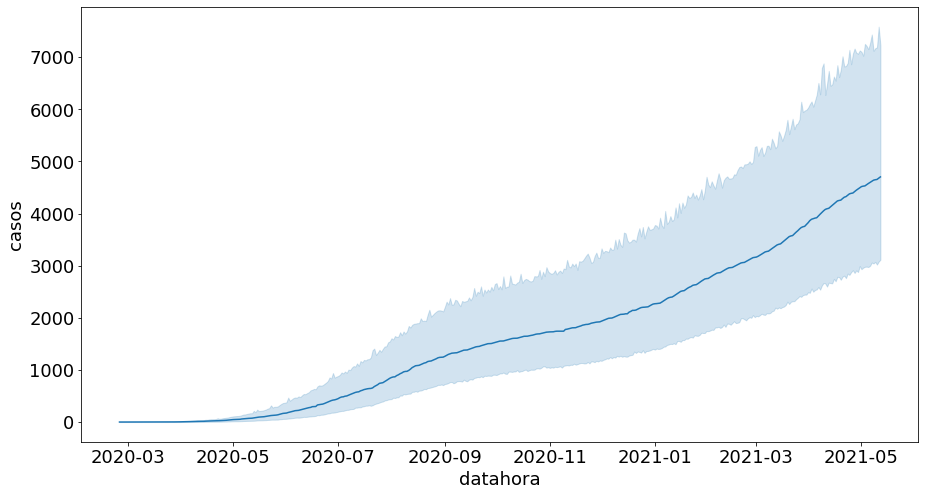

In [11]:
sns.lineplot(x='datahora', y = 'casos', data = dados)

$$ e^x $$

In [12]:
import numpy as np

In [13]:
eixo_x = np.linspace(-2, 2, 100)

In [14]:
y_exp = np.exp(eixo_x) 

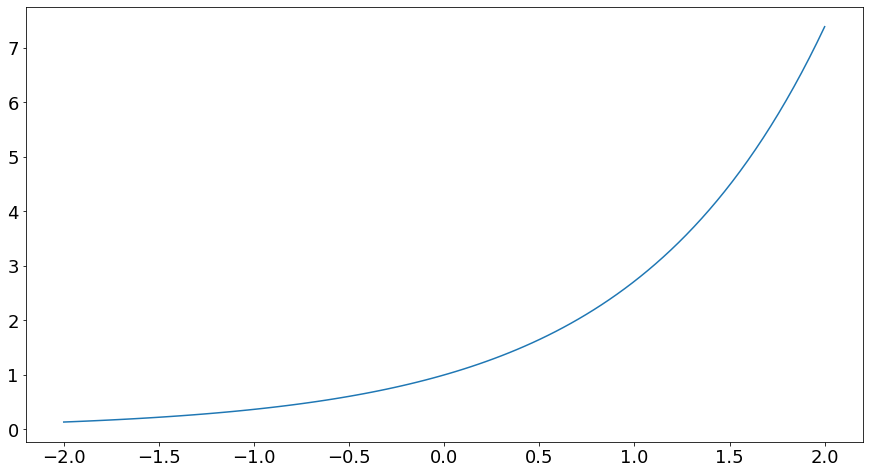

In [15]:
sns.lineplot(x = eixo_x, y = y_exp)

$$ log_2 2 = 1 $$
$$ log_2 2^x = x$$
$$ log_e e^x = x$$

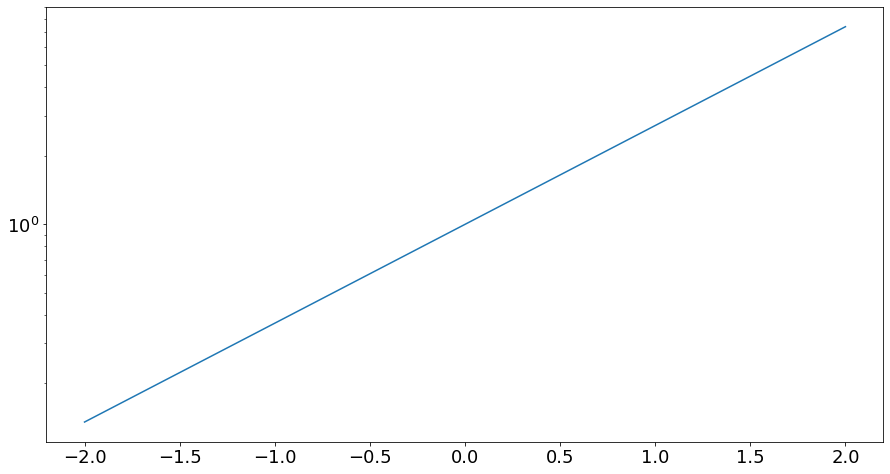

In [16]:
sns.lineplot(x = eixo_x, y = y_exp)
mpl.pyplot.yscale('log')

In [17]:
dados_sp = dados.query('nome_munic == "São Paulo"')

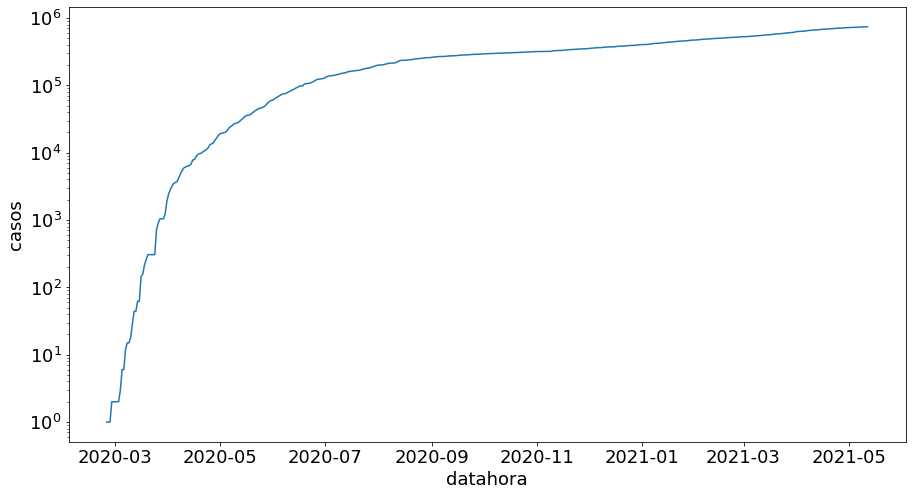

In [18]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)
mpl.pyplot.yscale('log')

## Aula 1.2)

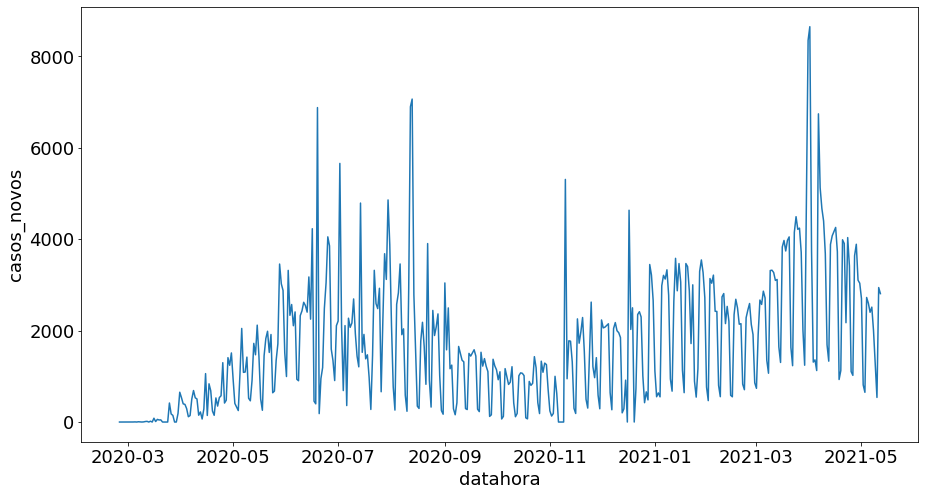

In [19]:
sns.lineplot(x='datahora', y='casos_novos', data = dados_sp)

In [20]:
dados_exemplo = pd.DataFrame(data=np.linspace( 1, 10, 10))

In [21]:
dados_exemplo.head()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [22]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

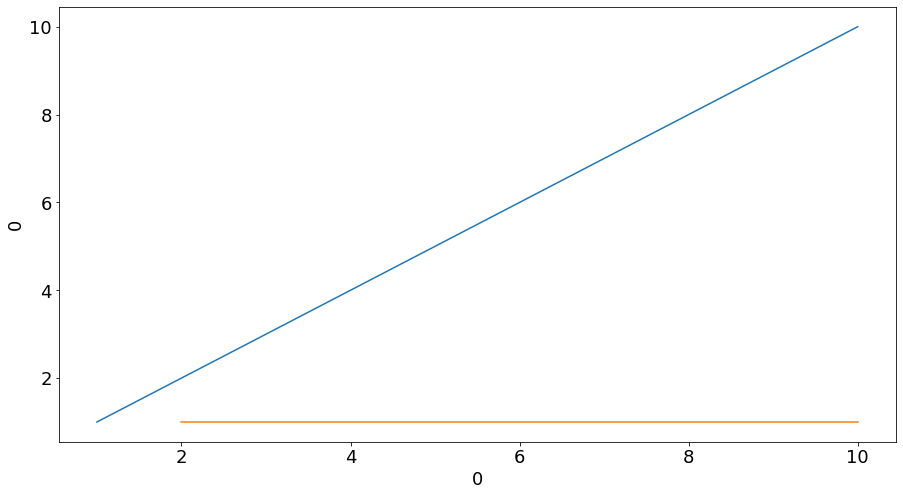

In [23]:
sns.lineplot(x = 0, y = 0, data=dados_exemplo)
sns.lineplot(x = 0, y = 'diferenciado', data=dados_exemplo)

$$y = a x + b$$

In [24]:
dados_sp['taxa_de_crescimento_casos'] =  dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] =  dados_sp['obitos_novos'].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


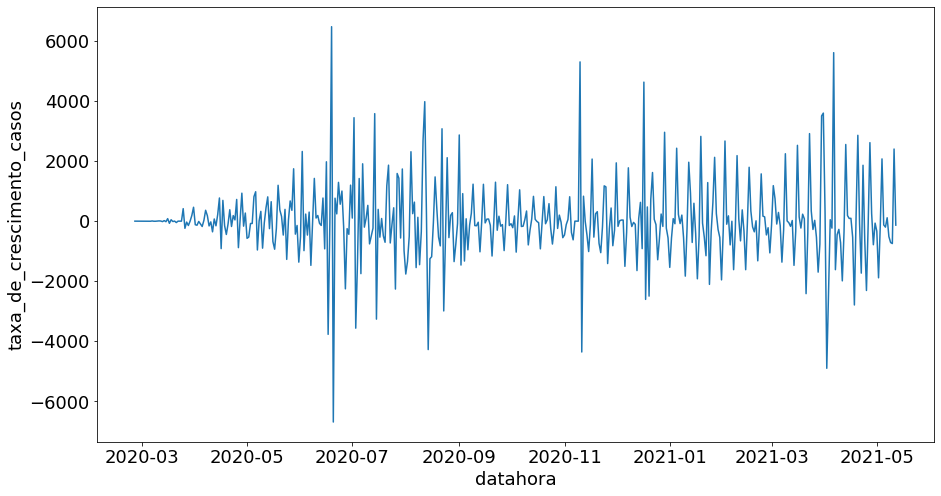

In [25]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data = dados_sp)

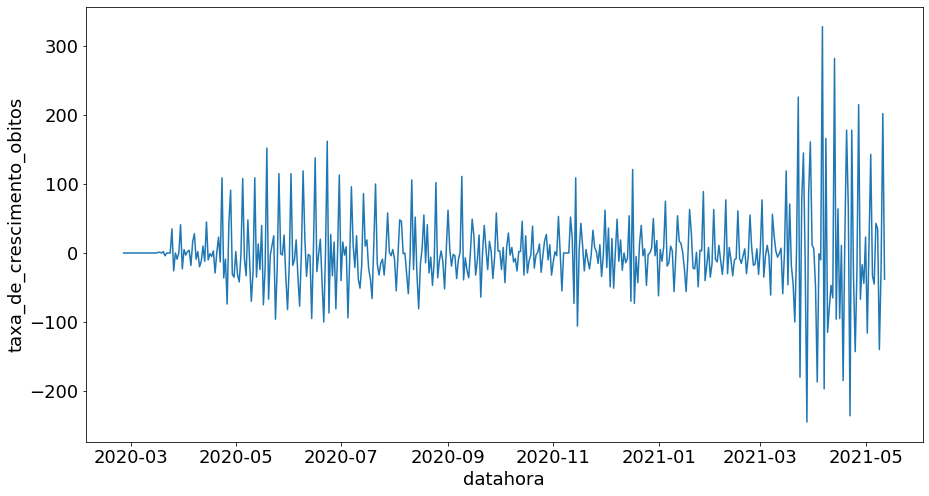

In [26]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data = dados_sp)

In [27]:
import matplotlib.pyplot as plt

<BarContainer object of 443 artists>

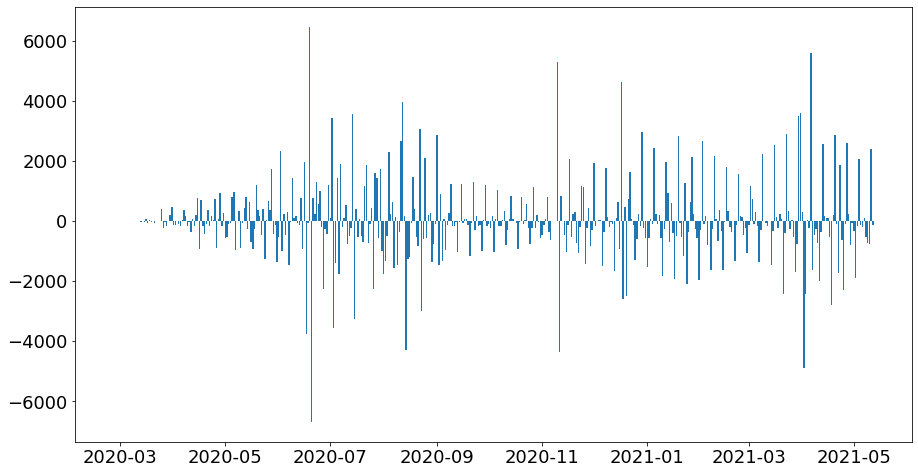

In [28]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [29]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
dados_2021 = dados_sp.query('ano == 2021')

<BarContainer object of 132 artists>

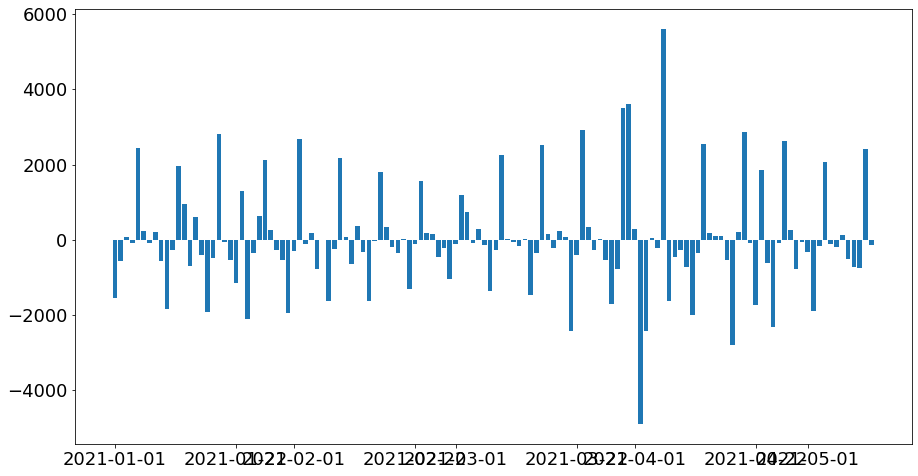

In [31]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

In [32]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


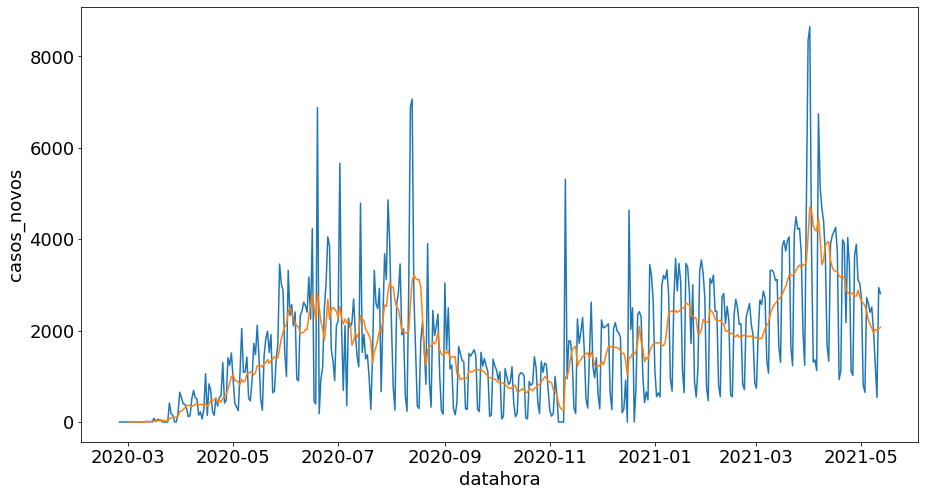

In [33]:
sns.lineplot(x='datahora', y = 'casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y = 'media_movel_casos', data=dados_sp)

## Aula 1.3)

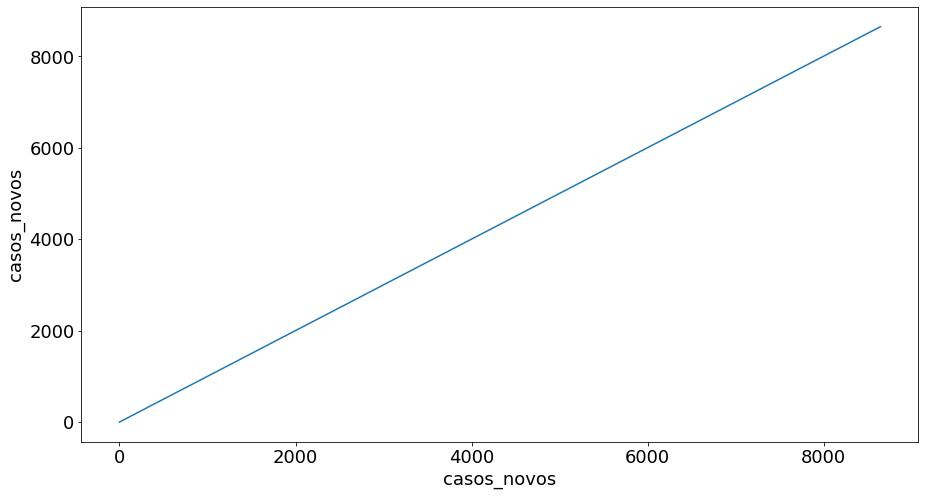

In [34]:
sns.lineplot(x='casos_novos', y='casos_novos', data=dados_sp)

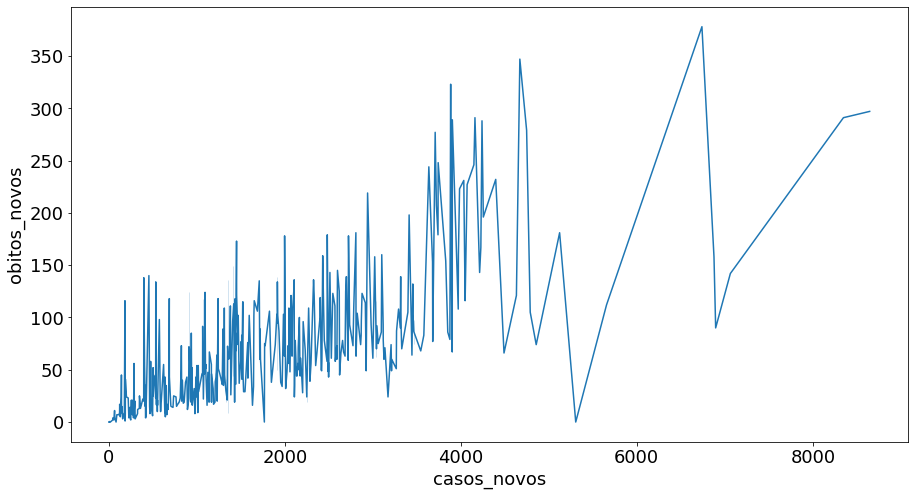

In [35]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)

In [36]:
dados_202101 = dados_sp.query('mes == 1 & ano == 2021')
dados_202102 = dados_sp.query('mes == 2 & ano == 2021')

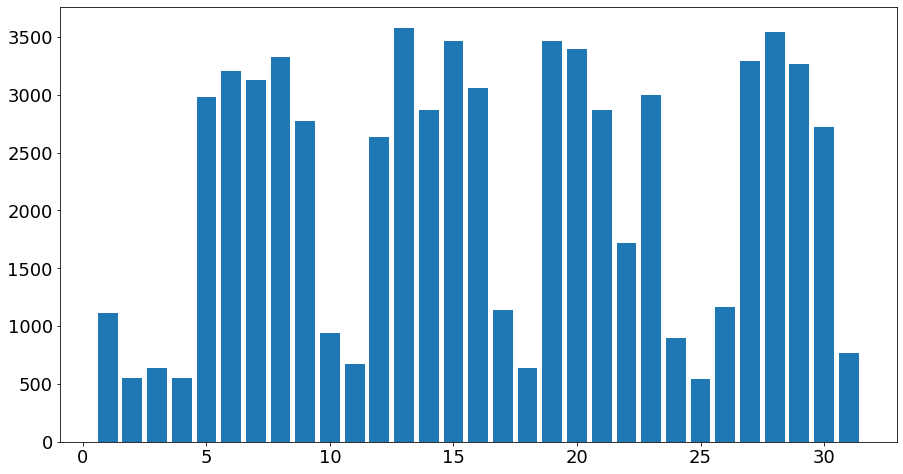

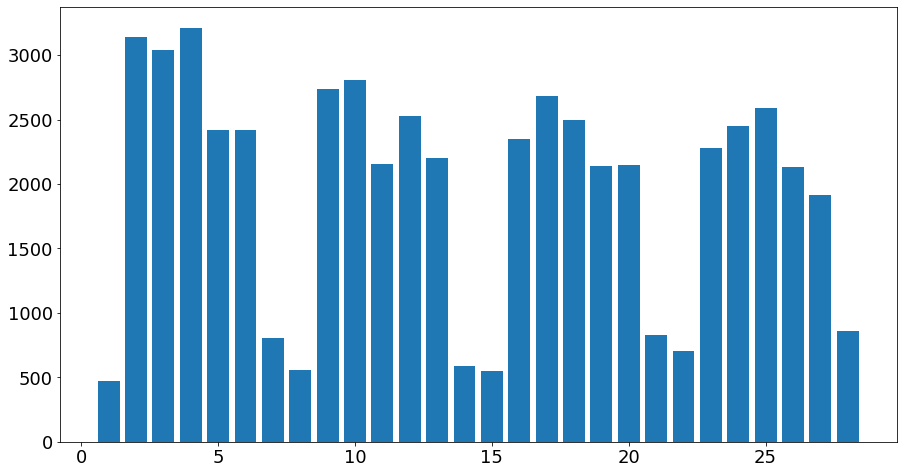

In [37]:
plt.bar(np.linspace(1, 31, 31), dados_202101['casos_novos'])

plt.show()

plt.bar(np.linspace(1, 28, 28), dados_202102['casos_novos'])

plt.show()

In [38]:
from pandas.plotting import autocorrelation_plot

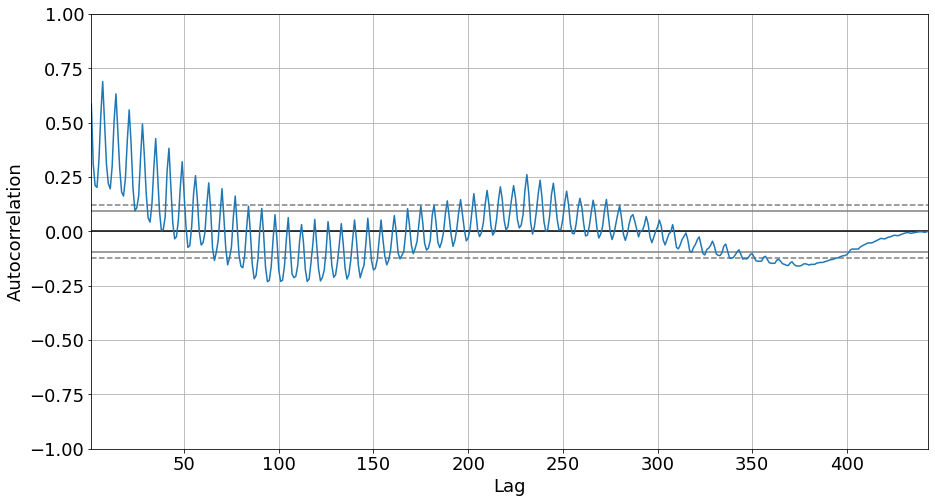

In [39]:
autocorrelation_plot(dados_sp['casos_novos'])

In [40]:
dados_sp.shape

(443, 31)

In [41]:
aleatorio = np.random.rand(443)

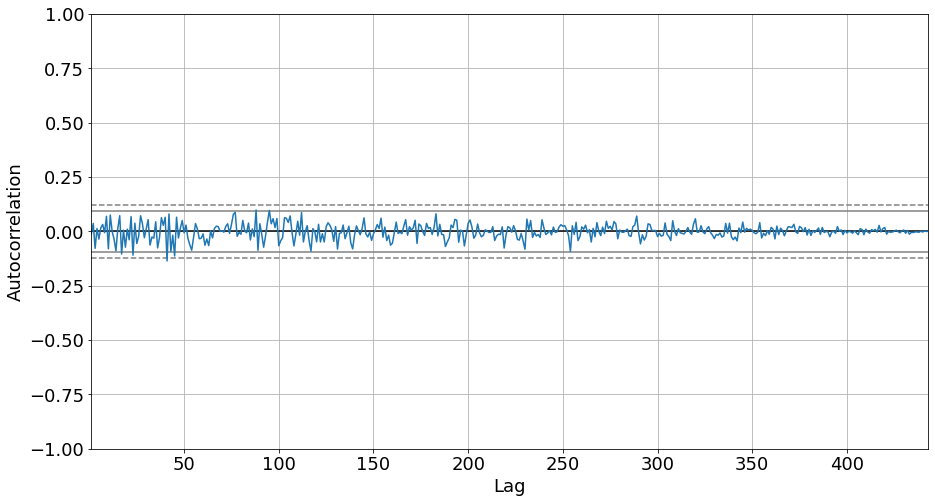

In [42]:
autocorrelation_plot(aleatorio)

# Aula 2)

In [43]:
df = pd.DataFrame()

In [44]:
df['ds'] = dados_sp['datahora'][:400]

In [45]:
df['y'] = dados_sp['casos_novos'][:400]

In [46]:
from fbprophet import Prophet

In [47]:
modelo = Prophet()

In [48]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [50]:
dataframefuturo.head()

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29


In [51]:
previsao = modelo.predict(dataframefuturo)

In [52]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-137.621348,-788.414837,1407.643679,-137.621348,-137.621348,457.699352,457.699352,457.699352,457.699352,457.699352,457.699352,0.0,0.0,0.0,320.078004
1,2020-02-26,-119.843618,-704.994589,1417.326534,-119.843618,-119.843618,456.859942,456.859942,456.859942,456.859942,456.859942,456.859942,0.0,0.0,0.0,337.016324
2,2020-02-27,-102.065887,-586.984683,1631.285223,-102.065887,-102.065887,596.079908,596.079908,596.079908,596.079908,596.079908,596.079908,0.0,0.0,0.0,494.014021
3,2020-02-28,-84.288157,-894.133756,1336.997064,-84.288157,-84.288157,340.781628,340.781628,340.781628,340.781628,340.781628,340.781628,0.0,0.0,0.0,256.493471
4,2020-02-29,-66.510426,-1136.596151,1066.612797,-66.510426,-66.510426,59.114795,59.114795,59.114795,59.114795,59.114795,59.114795,0.0,0.0,0.0,-7.395631


In [53]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

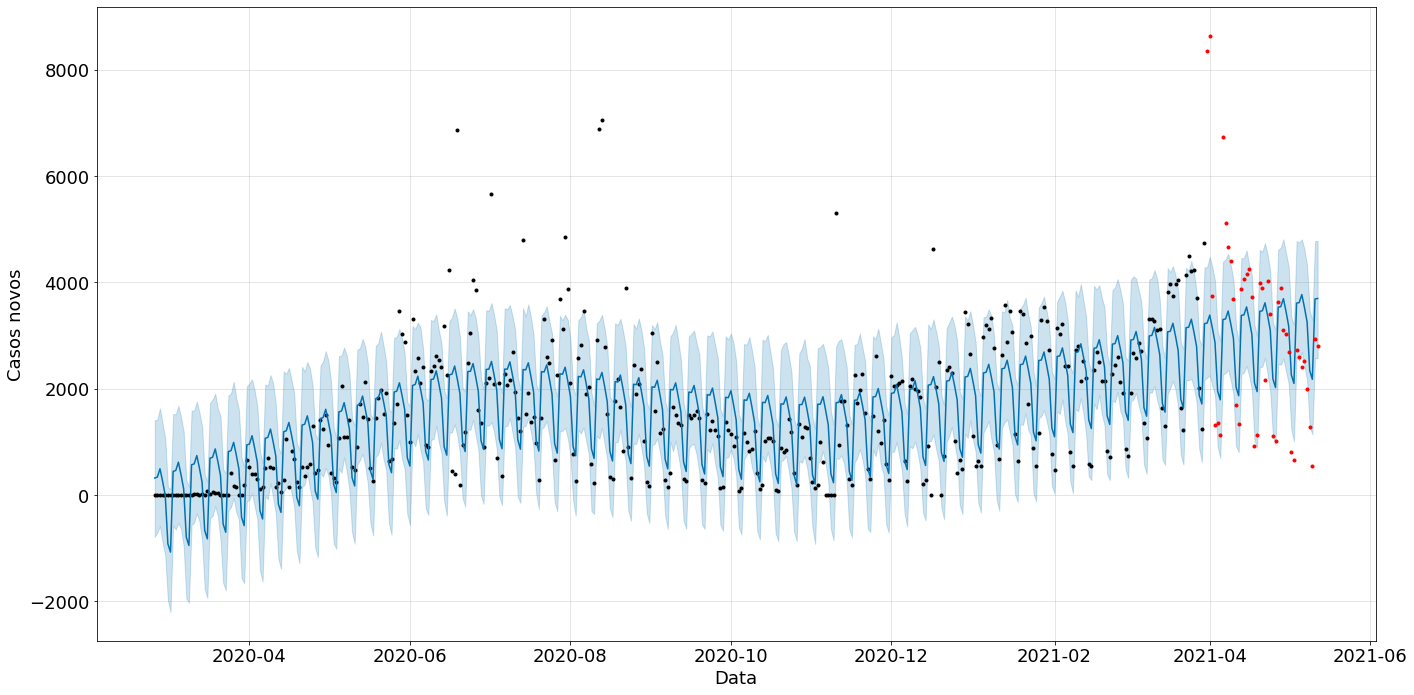

In [54]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20, 10));
plt.plot(df_teste['ds'], df_teste['y'], '.r')

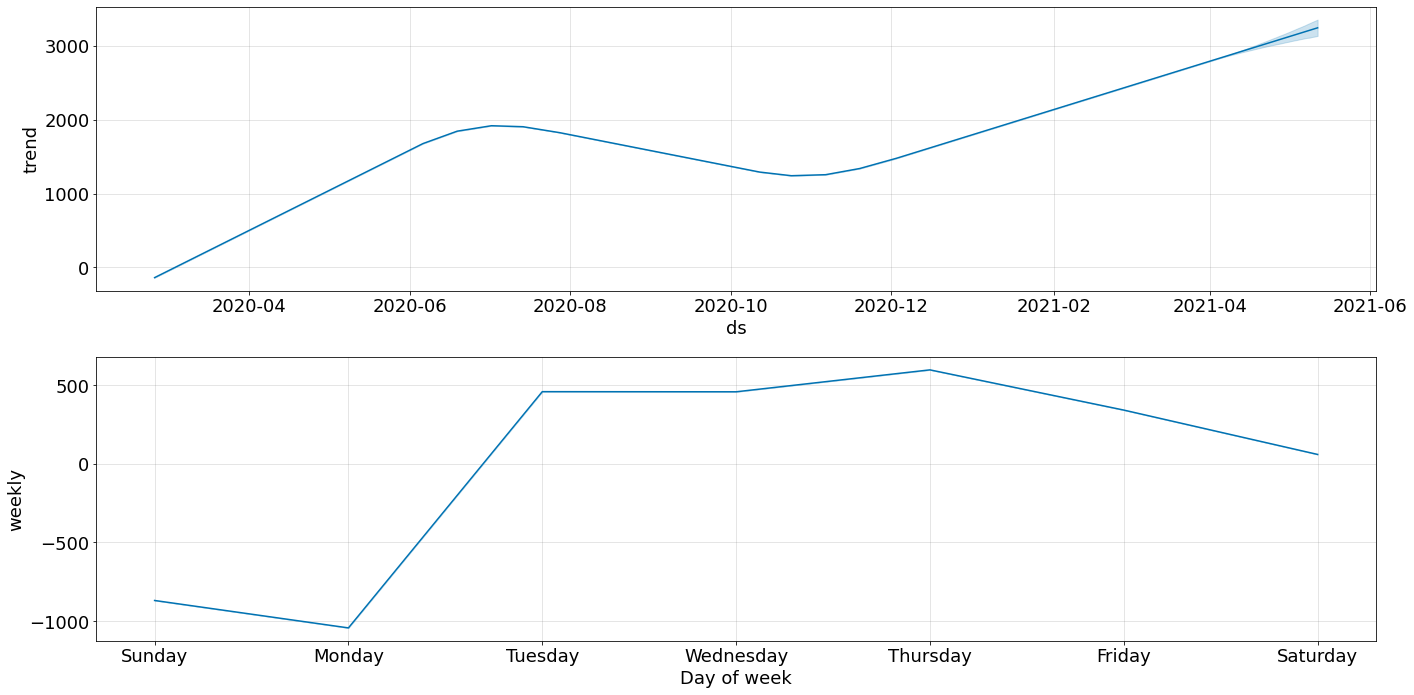

In [55]:
modelo.plot_components(previsao, figsize=(20,10));

# Aula 3)

In [56]:
from fbprophet.plot import add_changepoints_to_plot

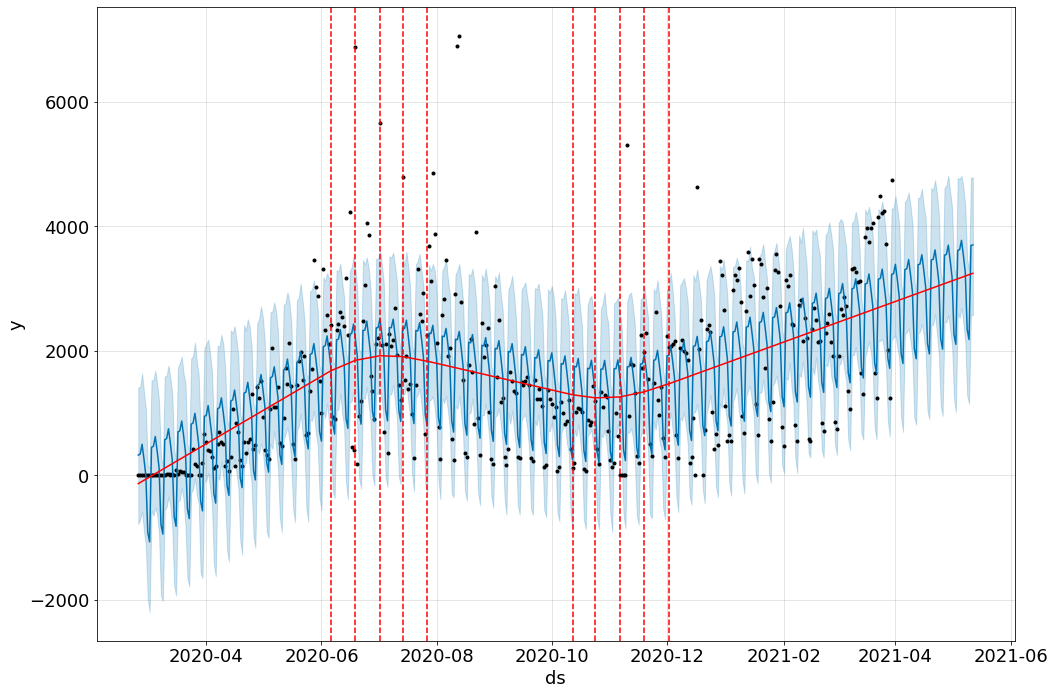

In [57]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [58]:
modelo = Prophet(changepoints=['2020-12-31'])

In [59]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [61]:
previsao = modelo.predict(dataframefuturo)

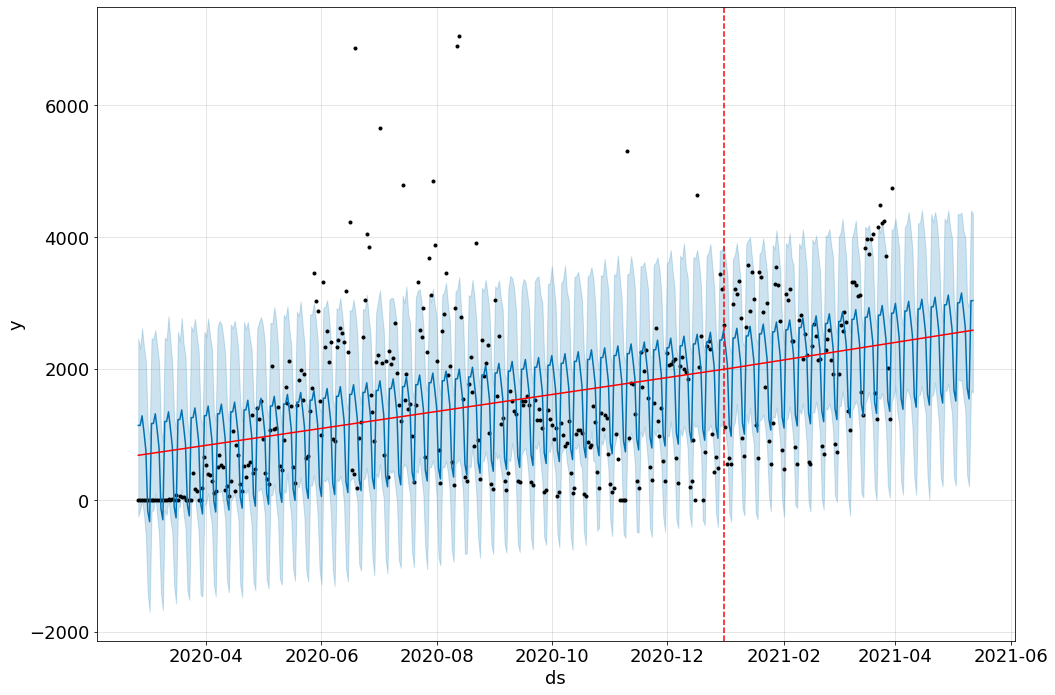

In [62]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

# Aula 4)

In [63]:
modelo = Prophet(changepoint_prior_scale=10.0)

modelo.add_country_holidays(country_name='BR')

modelo.fit(df)

dataframefuturo = modelo.make_future_dataframe(periods=43)

previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


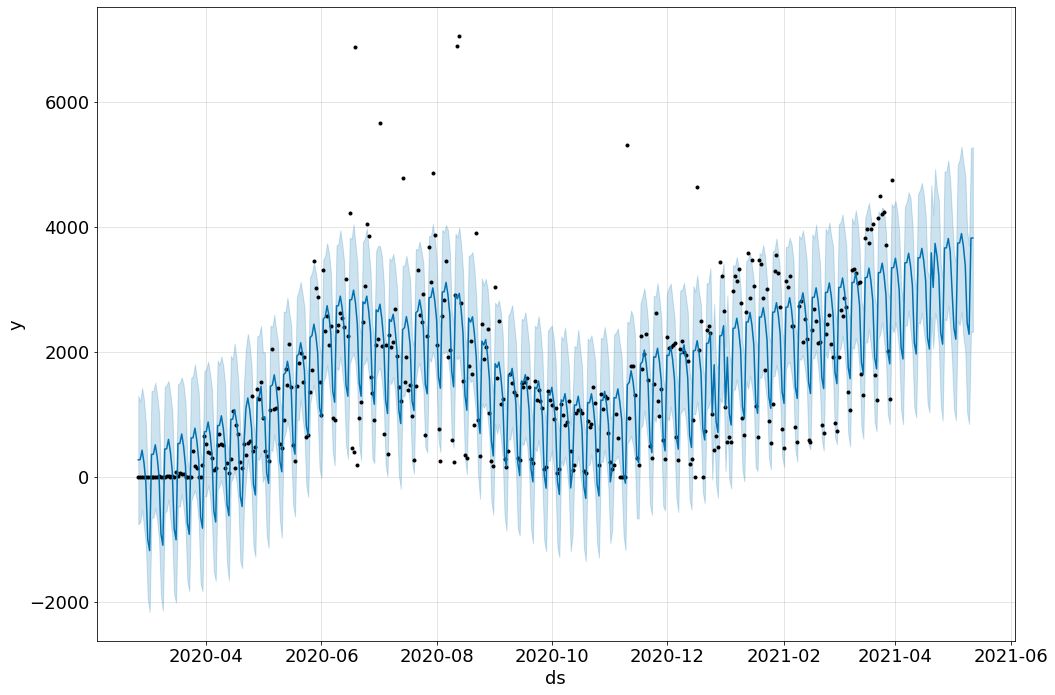

In [64]:
fig = modelo.plot(previsao, figsize=(15,10))

In [65]:
feriados_sp_2020 = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]

In [66]:
feriados_sp_2020 = pd.DataFrame({'holiday': 'sp_2020', 
                                 'ds'     : pd.to_datetime(feriados_sp_2020)}
                                )

In [67]:
feriados_sp_2021 = pd.DataFrame({'holiday': 'sp_2021', 
                                 'ds'     : pd.to_datetime(feriados_sp_2021)}
                                )

In [68]:
feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [69]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')

modelo_feriados.fit(df)

dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)

previsao = modelo_feriados.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


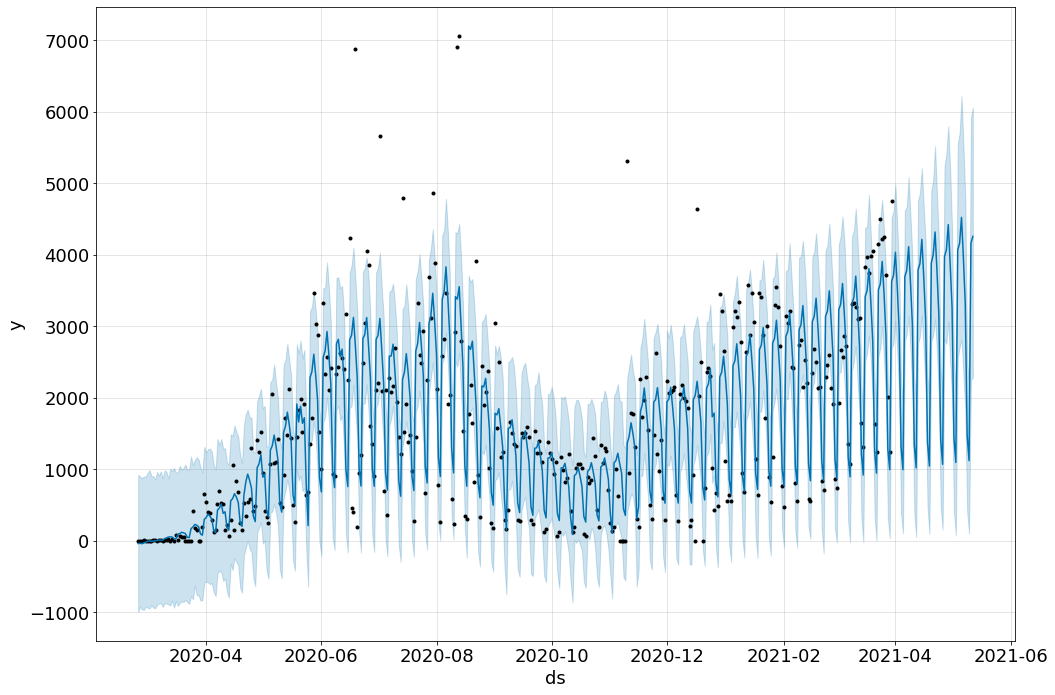

In [70]:
fig = modelo_feriados.plot(previsao, figsize=(15,10))

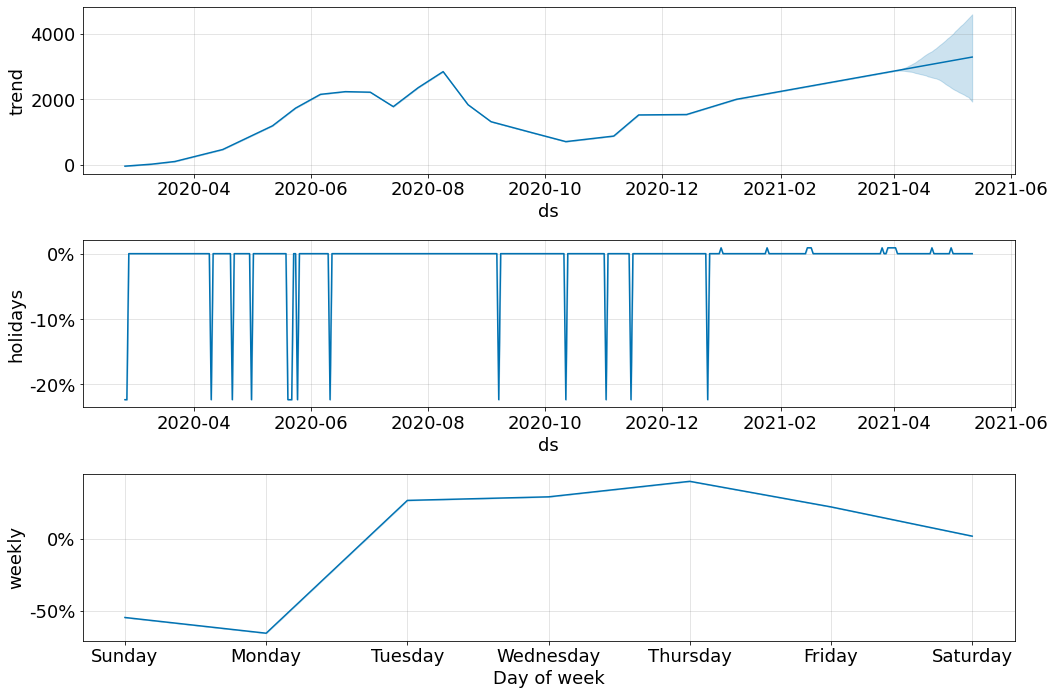

In [71]:
fig = modelo_feriados.plot_components(previsao, figsize=(15,10))

In [72]:
from sklearn.metrics import mean_absolute_error

In [73]:
#Sazonalidade aditiva

mean_absolute_error(df['y'],previsao['yhat'][:400])

452.3618279357078

In [74]:
#Sazonalidade multiplicativa

mean_absolute_error(df['y'],previsao['yhat'][:400])

452.3618279357078

# Aula 5)

## Aula 5.1)

In [75]:
novo_y = df.reset_index()

In [76]:
novo_y

,index,ds,y
0,562,2020-02-25,0
1,1207,2020-02-26,0
2,1852,2020-02-27,0
3,2497,2020-02-28,1
4,3142,2020-02-29,0
...,...,...,...
395,255337,2021-03-26,4241
396,255982,2021-03-27,3709
397,256627,2021-03-28,2010
398,257272,2021-03-29,1242


In [77]:
sem_outliers = novo_y[ (novo_y['y'] > previsao['yhat_lower'][:400]  ) & (novo_y['y'] < previsao['yhat_upper'][:400] ) ]  

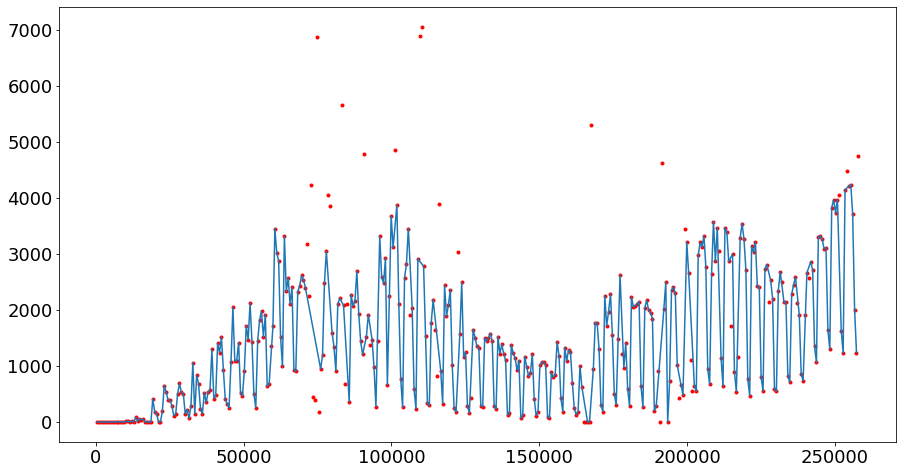

In [78]:
plt.plot(df.index, df['y'], 'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])

In [79]:
df_sem_outliers = sem_outliers[['ds', 'y']]

In [80]:
df_sem_outliers.head()

,ds,y
0,2020-02-25,0
1,2020-02-26,0
2,2020-02-27,0
3,2020-02-28,1
4,2020-02-29,0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


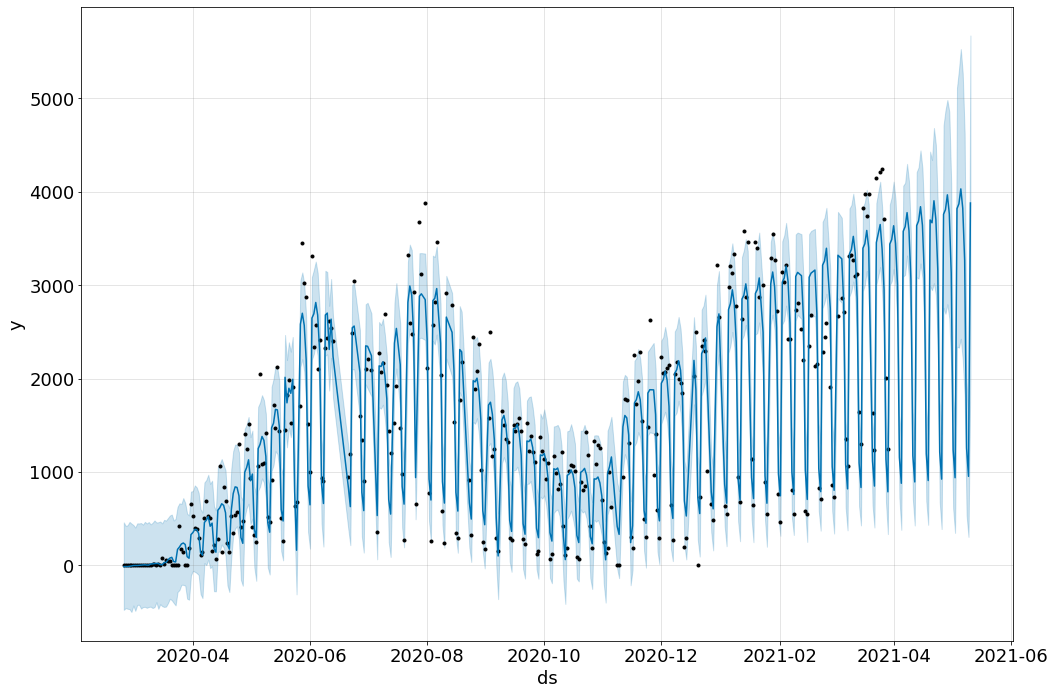

In [81]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')

modelo_feriados.fit(df_sem_outliers)

dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)

previsao = modelo_feriados.predict(dataframefuturo)

fig = modelo_feriados.plot(previsao, figsize=(15,10))

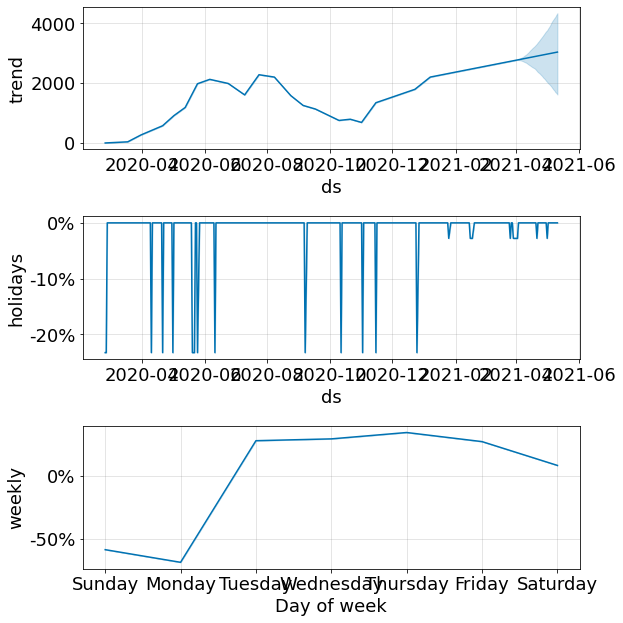

In [82]:
fig = modelo_feriados.plot_components(previsao)

In [83]:
amostras = modelo_feriados.predictive_samples(previsao)

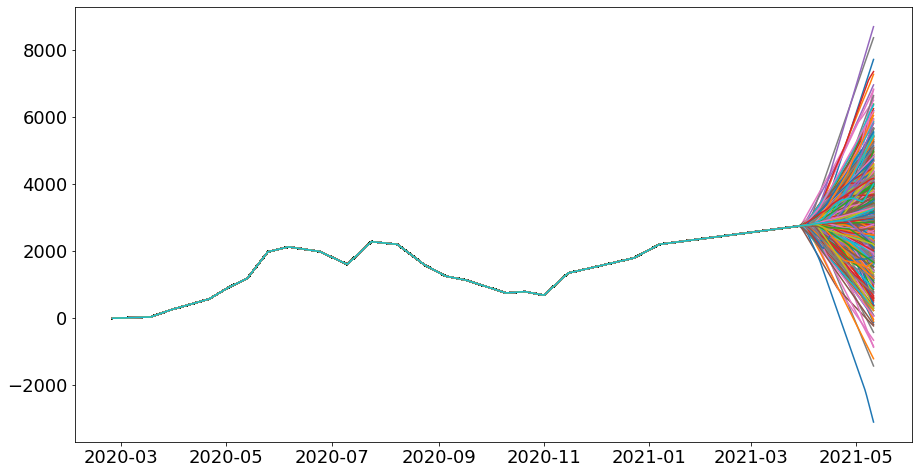

In [84]:
plt.plot(previsao['ds'], amostras['trend']);

In [85]:
from fbprophet.diagnostics import cross_validation

In [87]:
df_cv = cross_validation(modelo_feriados, initial='180 days', period='30 days', horizon='30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


In [104]:
janela = 5

In [105]:
cutoff = df_cv['cutoff'].unique()[janela]

In [106]:
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

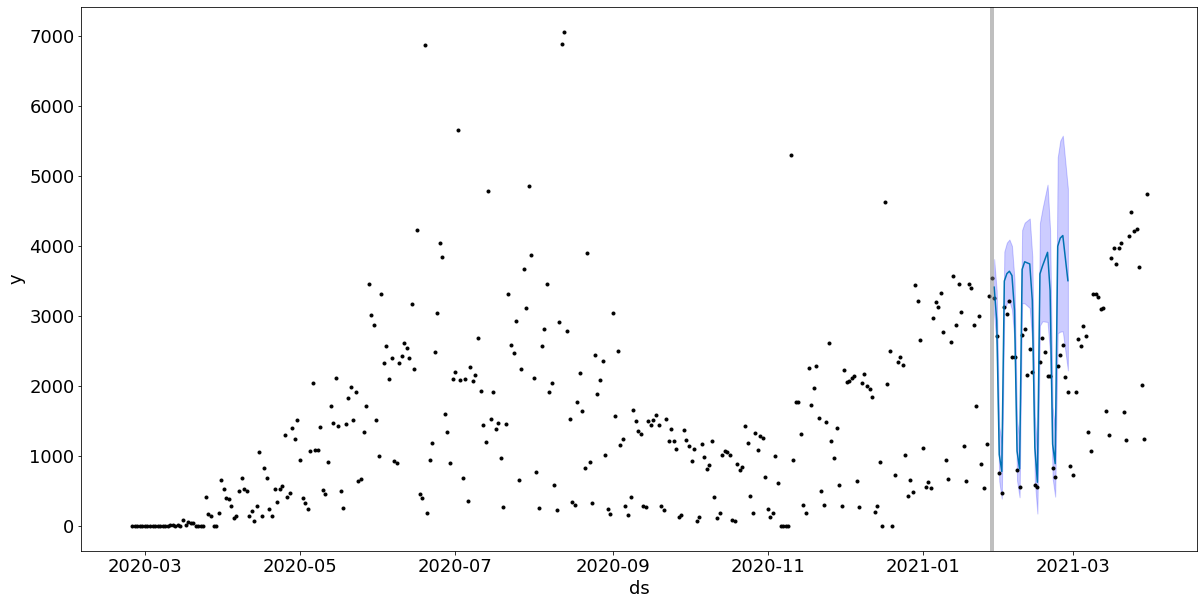

In [107]:

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [108]:
from fbprophet.diagnostics import performance_metrics

In [109]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [110]:
df_p

,horizon,mse,rmse,mae,mdape,coverage
0,3 days,8.126167e+04,285.064334,206.861968,0.160142,0.833333
1,4 days,1.254464e+05,354.184201,283.129685,0.212392,0.777778
2,5 days,1.231269e+05,350.894478,286.707656,0.221364,0.825397
3,6 days,1.266273e+05,355.847352,290.652204,0.168986,0.796296
4,7 days,8.301276e+04,288.119355,232.845164,0.125329,0.888889
5,8 days,1.810050e+05,425.446837,326.003452,0.181955,0.722222
6,9 days,1.758122e+05,419.299648,320.735852,0.154561,0.777778
7,10 days,1.810755e+05,425.529622,346.726422,0.234258,0.755556
8,11 days,1.061182e+05,325.757906,282.672235,0.208138,0.904762
9,12 days,1.120300e+05,334.708781,254.491289,0.122173,0.904762


In [111]:
from fbprophet.plot import plot_cross_validation_metric

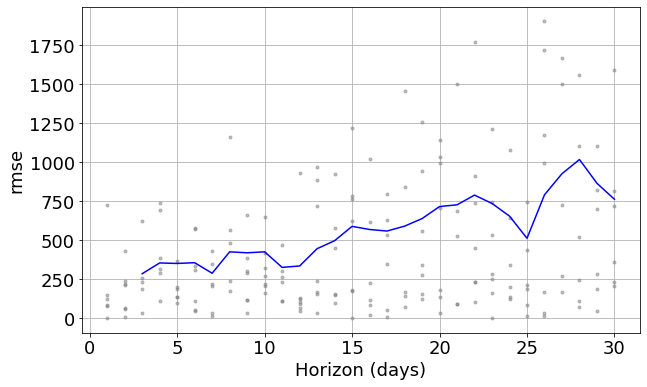

In [113]:
plot_cross_validation_metric(df_cv, metric='rmse');